<img src="img/decisionmaking.png" width="400">

# ELEC-E7851 - ELEC-E7890 - User Research
# Lecture 3 - Inference

**Aurélien Nioche**

Aalto University

<div class="alert alert-block alert-success">
<h2><img src="img/logo/goal.png" width="20" align="left">&nbsp;Learning objectives</h2>
    <br>
    <ul>
        <li> Understand what is a inferential test and a <i>p</i> value
        <li> Being able to assess the statistical significance of an experimental result
        <li> Differenciate what is a type-1 and type-2 error
        <li> Understand the conditions of application of a test
        <li> Know what are the most classical tests and when to apply them
        <li> Being able to assess the external validy of a study
    </ul>
</div>

## Course Overview

<br>

<h3><a href="#S1"> 1. Inferential statistics: what for?</a></h3>

<h3><a href="#S2"> 2. The p-value as a probability to reject the null hypothesis by mistake</a></h3>

<h3><a href="#S3"> 3. The significance threshold(s)</a></h3>

<h3><a href="#S4"> 4. I got it wrong: Error type I and Error type II </a></h3>

<h3><a href="#S5"> 5. Case study: The Student's t-test</a></h3>

<a href="#S5.1"> 5.1 Compute the t statistic </a>

<a href="#S5.2"> 5.2 Compute the p-value </a>

<a href="#S5.3"> 5.3 One-sided vs two-sided </a>

<a href="#S5.4"> 5.4 The number of subjects matters</a>

<h3><a href="#S6"> 6. The condition of application of a stastical test: Which test can I use?</a></h3>

<a href="#S6.1"> 6.1 The number of subjects is not the same and/or variances are unequal: Welch's t-test</a>

<a href="#S6.2"> 6.2 The distribution is not (does not seem) normal: Rank dependant tests</a>

<a href="#S6.3">6.3 I want to compare the effect of two factors: ANOVA</a>

<a href="#S6.4"> 6.4 I want to test the relation between two (continuous) variables: Regression Analysis</a>


<a href="#S6.5"> 6.5 I have only one group: Confidence Interval</a>

<h3><a href="#S7"> 7. External validity: The todo-NOT list</a></h3>

<a href="#C">Conclusive Remarks and a Few Takeaways</a>

<a href="#Additional-material">Additional material</a>

# 1. Inferential statistics: What for?<a id="S1"></a>
<a href="#Course-Overview">Course Overview</a>

Let's start from where we stopped last time...

---

Let's considerate data $D_N$ that follows a normal distribution, that is such that:
$$ D_N\sim \mathcal{N} (\mu ,\sigma )$$
the probability density function of the normal distribution being :
$$ {f(x)= \frac {1}{\sigma {\sqrt {2\pi }}}}e^{-{\frac {1}{2}}\left({\frac {x-\mu }{\sigma }}\right)^{2}} $$

In [3]:
# Import the libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import string  # for adding letters in the figures
import scipy.special as sps  # For gamma function
from statsmodels.formula.api import ols # For regression analysis
from statsmodels.stats.anova import anova_lm # For ANOVA

np.set_printoptions(threshold=8)  # Don't print to much elements

In [4]:
# Define the parameters of my samples
mean_1 = 150.0
mean_2 = 200.0

small_sd = 10.0
large_sd = 50.0

n = 100

In [5]:
# Seed the random number generator for reproducibility
np.random.seed(4)

# Generate two samples with a small standard deviation
x1_small_sd = np.random.normal(mean_1, scale=small_sd, size=n)
x2_small_sd = np.random.normal(mean_2, scale=small_sd, size=n)

# Generate two samples with a large standard deviation
x1_large_sd = np.random.normal(mean_1, scale=large_sd, size=n)
x2_large_sd = np.random.normal(mean_2, scale=large_sd, size=n)

print("x1_small_std:", x1_small_sd)
print("x2_small_std:", x2_small_sd)
print("x1_large_std:", x1_large_sd)
print("x2_large_std:", x2_large_sd)

x1_small_std: [150.50561707 154.99951333 140.04091069 ... 148.2853539  140.55631401
 152.80864675]
x2_small_std: [207.38247111 206.50753231 206.1474063  ... 208.76742482 195.17121314
 190.14581539]
x1_large_std: [126.36685922 154.8133972  211.46066976 ... 181.62572316 194.21939087
 214.11836842]
x2_large_std: [259.72581298 175.06396376 195.96301932 ... 250.30749908 222.71614304
 179.27631164]


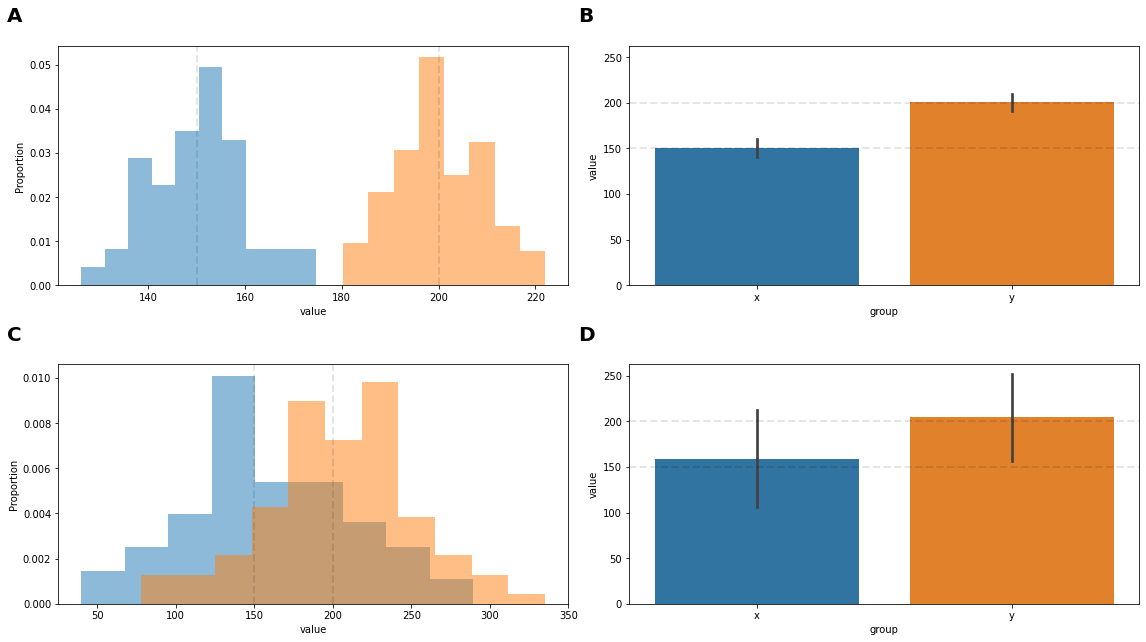

In [6]:
# Create figure and axes
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(16, 9))

# Loop over the two datasets (containing each two samples)
for i, (val1, val2) in enumerate(((x1_small_sd, x2_small_sd), (x1_large_sd, x2_large_sd))):
    
    # Do the histogram
    ax = axes[i, 0]
    sns.histplot(val1, ax=ax, color="C0", kde=False, linewidth=0, alpha=0.5, stat="density")
    sns.histplot(val2, ax=ax, color="C1", kde=False, linewidth=0, alpha=0.5, stat="density")
    
    # Plot the theoretical mean
    ax.axvline(mean_1, ls='--', color='black', alpha=0.1, lw=2)
    ax.axvline(mean_2, ls='--', color='black', alpha=0.1, lw=2)

    # Set the axis labels
    ax.set_ylabel("Proportion")
    ax.set_xlabel("value")
    
    # Dot the barplot
    ax = axes[i, 1]
    df = pd.DataFrame({"x": val1, "y": val2}).melt(var_name="group")
    sns.barplot(x="group", y="value", ax=ax, data=df, ci="sd")
    
    # Set y-axis limit
    ax.set_ylim(0, max(mean_1, mean_2) + large_sd * 1.25)
    
    # Add horizontal lines representing the means
    ax.axhline(mean_1, ls='--', color='black', alpha=0.1, lw=2)
    ax.axhline(mean_2, ls='--', color='black', alpha=0.1, lw=2)

# Add letters
for i, ax in enumerate(axes.flatten()):
    ax.text(-0.1, 1.1, string.ascii_uppercase[i], transform=ax.transAxes, 
            size=20, weight='bold')

plt.tight_layout()
plt.show()

In [7]:
# Run a Student's t-test
t, p = stats.ttest_ind(x1_large_sd, x2_large_sd)

# Print the results
print(f"t={t}, p={p}")

t=-6.2698379730170615, p=2.2209697178288552e-09


# 2. The p-value as a probability to reject the null hypothesis by mistake <a id="S2"></a>
<a href="#Course-Overview">Course Overview</a>

In [73]:
# Seed the random number generator
np.random.seed(1234)

# Set the parameters
n = 100
mu1, mu2 = 100, 110
sigma1, sigma2 = 30, 60

# Generate two samples
x1 = np.random.normal(mu1, scale=sigma1, size=n)
x2 = np.random.normal(mu2, scale=sigma2, size=n)

# Make a few prints
print("x1", x1)
print("x2", x2)

x1 [114.14305491  64.27072916 142.98120905 ... 115.84864436  67.9303365
  84.64356073]
x2 [127.47232158 143.99202178 140.21550555 ... 163.34944964 127.30261086
  46.90766375]


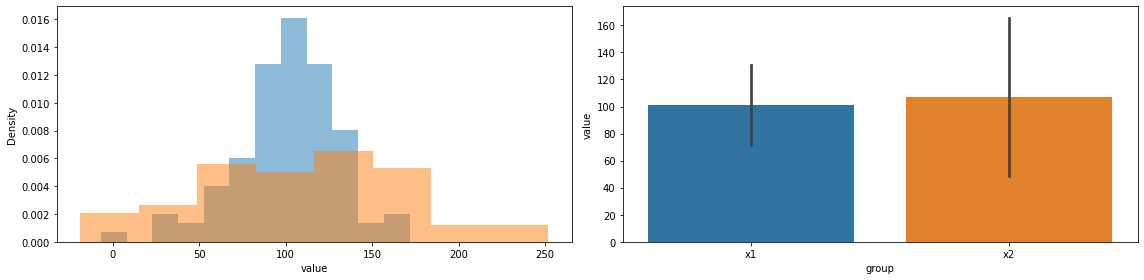

In [74]:
# Create figure and axes
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 4))

# Create the histograms
for (x, color) in ((x1, "C0"), (x2, "C1")):
    sns.histplot(x, ax=ax1, color=color, linewidth=0, alpha=0.5, 
                 stat="density")  # y-axis is density instead of counts

# Put labels
ax1.set_ylabel("Density")
ax1.set_xlabel("value")

# Plot the barplot
df = pd.DataFrame({"x1": x1, "x2": x2}).melt(var_name="group")
sns.barplot(x="group", y="value", ax=ax2, data=df, ci="sd")

plt.tight_layout()
plt.show()

In [75]:
# Run a Welch t-test
t, p = stats.ttest_ind(x1, x2, equal_var=False)

# Print the results
print(f"t = {t}, p = {p}")

t = -0.8967917151340026, p = 0.37129608235308287


In [76]:
# Compute the observed means for the two samples
m1 = np.mean(x1)
m2 = np.mean(x2)

# Compute the observed standard deviations for the two samples
sig1 = np.std(x1)  
sig2 = np.std(x2)

# Make a few prints
print("mean observed x1", m1)
print("mean observed x2", m2)
print("sd observed x1", sig1)
print("sd observed x2", sig2)

mean observed x1 101.05336849376309
mean observed x2 106.990752612104
sd observed x1 29.870545510062087
sd observed x2 58.71351368741412


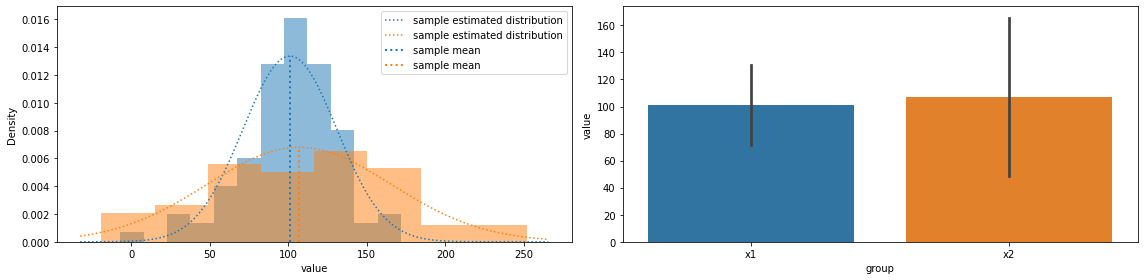

In [77]:
# Create figure and axes
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 4))

# Plot the histogram
for (x, color) in (x1, "C0"), (x2, "C1"):
    sns.histplot(x, ax=ax1, color=color, linewidth=0, alpha=0.5, stat="density")

# Plot the bell curves

x_min, x_max = ax1.get_xlim()
for m, sig, color in (m1, sig1, "C0"), (m2, sig2, "C1"):
    
    ymax = stats.distributions.norm.pdf(m, loc=m, scale=sig)
    ax1.vlines(m, ymin=0, ymax=ymax,transform=ax1.transData,
               label="sample mean", color=color, lw=2, ls=':')

    x_th = np.linspace(x_min, x_max, 1000)
    y_th = stats.distributions.norm.pdf(x_th, loc=m, scale=sig)
    
    ax1.plot(x_th, y_th, color=color, label="sample estimated distribution", ls=':')

# Set the axis labels 
ax1.set_ylabel("Density")
ax1.set_xlabel("value")

# Create the legend
ax1.legend()

# Plot the barplot
df = pd.DataFrame({"x1": x1, "x2": x2}).melt(var_name="group")
sns.barplot(x="group", y="value", ax=ax2, data=df, ci="sd")

plt.tight_layout()
plt.show()

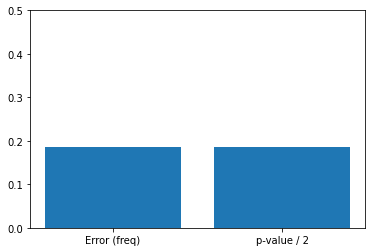

In [78]:
# Set the parameters
n_dataset = 10000

# Container for the results 
mu1_sup_mu2 = np.zeros(n_trials)

# Create data for each dataset
for i in range(n_dataset):
    
    # Create two samples
    x1 = np.random.normal(m1, scale=sig1, size=n)
    x2 = np.random.normal(m2, scale=sig2, size=n)
    
    # Look if observed mean for sample 1
    # is superior for sample 2
    r = np.mean(x1) > np.mean(x2)
    
    # Store the result 
    mu1_sup_mu2[i] = r

# Compute the frequence with which 
# 'inverse' difference is observed
err_freq = np.mean(mu1_sup_mu2)

# Create figure and axe
fig, ax = plt.subplots()

# Define labels
labels = ['Error (freq)', "p-value / 2"]

# Defines values
values = [err_freq, p/2]

# Create barplot
ax.bar(labels, values)

# Set the limit of the y-axis
ax.set_ylim(0, 0.5)

plt.show()

# 3 The significance threshold(s)<a id="S3"></a>
<a href="#Course-Overview">Course Overview</a>

In human/animal related studies (but not only), $p=0.05$ (5% error)

<img src="img/p005.jpg" width="600">

# 4. I got it wrong: Error type I and Error type II <a id="S4"></a>
<a href="#Course-Overview">Course Overview</a>

 || Null hypothesis is true | null hypothesis is false |
|--- | --- | ----------- |
|**Reject null hypothesis**| False positive = Type I error | true negative |
|**Do not reject null hypothesis** | True positive | False negative = Type II error |

<img src="img/error.png" width="300">

## 4.1 Error type I: False positive <a id="S4.1">
<a href="#Course-Overview">Course Overview</a>

In [79]:
# Seed the random number generator
np.random.seed(46)

# Set the parameters
mu = 100
sig = 10
n = 20

# Generate two samples
x1 = np.random.normal(mu, scale=sig, size=n)
x2 = np.random.normal(mu, scale=sig, size=n)

# Make a few prints
print("x1", x1)
print("x2", x2)
print("mean x1", np.mean(x1))
print("mean x2", np.mean(x2))

x1 [105.8487584  112.3119574  108.21900264 ...  98.99906891 116.23757119
  86.63458352]
x2 [ 98.64867747  95.21659321  84.05024972 ...  96.40980352 104.54296187
  91.94502004]
mean x1 101.56887516675758
mean x2 96.09697686169982


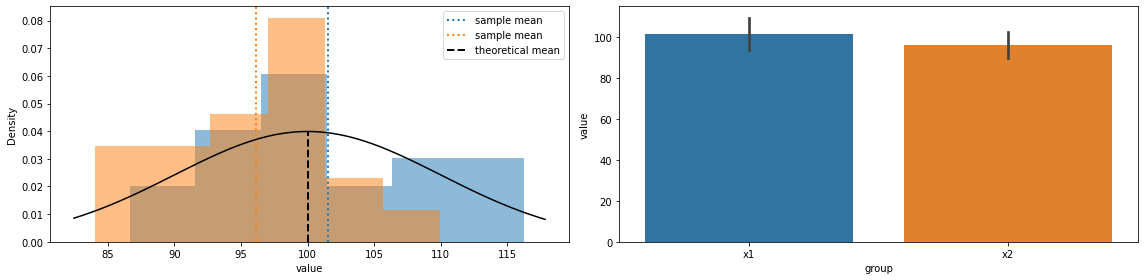

In [80]:
# Create the fig and axes
fig, axes = plt.subplots(ncols=2, figsize=(16, 4))

# Do the histogram
ax = axes[0]
sns.histplot(x1, ax=ax, color="C0", linewidth=0, alpha=0.5, stat="density")
sns.histplot(x2, ax=ax, color="C1", linewidth=0, alpha=0.5, stat="density")

# Create the lines indicating the means
ax.axvline(np.mean(x1), label="sample mean", color='C0', lw=2, ls=':')
ax.axvline(np.mean(x2), label="sample mean", color='C1', lw=2, ls=':')

# Create the bell curve corresponding to the theoretic distribution
x_min, x_max= ax.get_xlim()
x_th = np.linspace(x_min, x_max, 1000)
y_th = stats.distributions.norm.pdf(x_th, loc=mu, scale=sig)
ax.plot(x_th, y_th, color="black")

# Create the line for the theoretical mean
ymax = stats.distributions.norm.pdf(mu, loc=mu, scale=sig)
ax.vlines(mu, ymin=0, ymax=ymax, 
          label="theoretical mean", color='black', lw=2, ls='--')

# Set the axis labels
ax.set_ylabel("Density")
ax.set_xlabel("value")

# Create the legend
ax.legend()

# Do the barplot
ax = axes[1]
df = pd.DataFrame({"x1": x1, "x2": x2}).melt(var_name="group")
sns.barplot(x="group", y="value", ax=ax, data=df, ci="sd")

plt.tight_layout()
plt.show()

In [81]:
# Set the threshold 
thr = 0.05

# Run the Student's t-test
t, p = stats.ttest_ind(x1, x2, equal_var=True)

# Print the results
print(f"t={t}, p={p}, can reject={p < thr}")

t=2.324641079949218, p=0.025533350157787085, can reject=True


## 4.2 Error type II: False negative <a id="S4.2">
<a href="#Course-Overview">Course Overview</a>

In [82]:
# Seed the random number generator
np.random.seed(0)

# Set the parameters
m1, m2 = 0, 1
sig = 0.9
n = 20

# Generate two samples
x1 = np.random.normal(m1, scale=sig, size=n)
x2 = np.random.normal(m2, scale=sig, size=n)

# Make a few prints
print("x1", x1)
print("x1", x2)

x1 [ 1.58764711  0.36014149  0.88086419 ... -0.18464244  0.28176093
 -0.76868617]
x1 [-1.29769083  1.58825674  1.77799258 ...  2.08214186  0.65140586
  0.72792752]


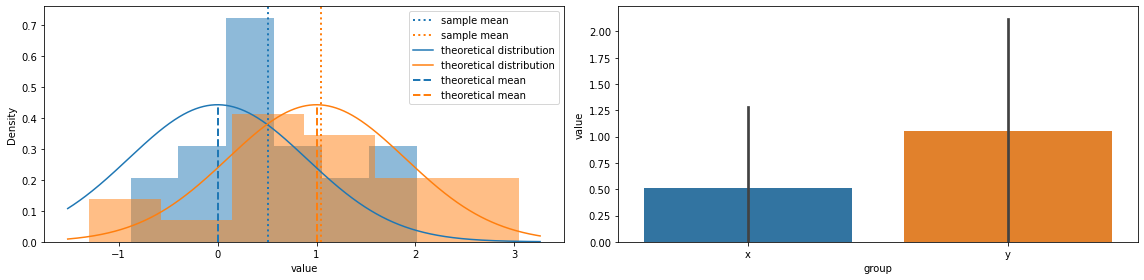

In [83]:
# Create the figure and axes
fig, axes = plt.subplots(ncols=2, figsize=(16, 4))

ax = axes[0]

# Plot the histogram
sns.histplot(x1, ax=ax, color="C0", linewidth=0, alpha=0.5, stat="density")
sns.histplot(x2, ax=ax, color="C1", linewidth=0, alpha=0.5, stat="density")

# Plot the sample means
ax.axvline(np.mean(x1), label="sample mean", color='C0', lw=2, ls=':')
ax.axvline(np.mean(x2), label="sample mean", color='C1', lw=2, ls=':')

# Plot the bell curves
x_min, x_max= ax.get_xlim()

# Plot the theoretic distributions for the two samples
for m, color in (m1, "C0"), (m2, "C1"):
    
    # Plot the line for the mean
    ymax = stats.distributions.norm.pdf(m, loc=m, scale=sig)
    ax.vlines(m, ymin=0, ymax=ymax,transform=ax.transData,
              label="theoretical mean", color=color, lw=2, ls='--')
    
    # Plot the bell curve
    x_th = np.linspace(x_min, x_max, 1000)
    y_th = stats.distributions.norm.pdf(x_th, loc=m, scale=sig)
    ax.plot(x_th, y_th, color=color, label="theoretical distribution", 
            ls='-')

# Create the axis labels 
ax.set_ylabel("Density")
ax.set_xlabel("value")

# Create the legend
ax.legend()

# Plot the barplot
ax = axes[1]
df = pd.DataFrame({"x": x1, "y": x2}).melt(var_name="group")
sns.barplot(x="group", y="value", ax=ax, data=df, ci="sd")

# Set the y-axis limits
ax.set_ylim(0, ax.get_ylim()[-1])

plt.tight_layout()
plt.show()

In [84]:
# Set the threshold
thr = 0.05

# Run a Student's t-test
t, p = stats.ttest_ind(x1, x2, equal_var=True)

# Print the result
print(f"t={t}, p={p}, can reject={p < thr}")

t=-1.7830545865581873, p=0.08256721720461004, can reject=False


<div class="alert alert-block alert-danger">
<h2><img src="img/logo/warning.png" width="20" align="left">&nbsp;Important</h2>
    <br>
    Do not confound <b>samples</b> mean (standard deviation) with <b> population</b> mean (standard deviation): the discrepancy between both is the cause of the false negatives and false positives!
    </div>

# 5 Case study: The Student's t-test<a id="S5"></a>
<a href="#Course-Overview">Course Overview</a>

<img src="img/William_Sealy_Gosset.jpg">
<center>William S. Gosset or "Student"</center>

## 5.1 Compute the t statistic <a id="S5.1"></a>
<a href="#Course-Overview">Course Overview</a>

The t statistic can be calculated as follows:

$$ t={\frac {{\bar {X}}_{1}-{\bar {X}}_{2}}{s_{p}{\sqrt {\frac {2}{n}}}}}$$
where $n = n_1 = n_2$ and $s_p$ is the pooled standard deviation of the two samples. 

Note that:
* The numerator of $t$ is the difference between two means
* The denominator of $t$ is the standard error of the difference between the two means.

The pooled standard deviation of the two samples $X_1$ and $X_2$, noted $s_p$, is defined as:

$$ s_{p}={\sqrt {\frac {s_{X_{1}}^{2}+s_{X_{2}}^{2}}{2}}} $$
with $s_{X_1}^2$ and $s_{X_2}^2$ are the unbiased estimators of the variances of $X_1$ and $X_2$.
 
The unbiased estimator of variance for a sample $X$ is defined as:

$${s_{X=[x_1, ..., x_n]}^{2}= {\frac {1}{n-1}}\sum _{i=1}^{n}\left(x_{i}-{\overline {X}}\right)^{2}}$$

Original article: <a href="doi:10.1093/biomet/6.1.1">Student" William Sealy Gosset (1908). "The probable error of a mean" (PDF). Biometrika. 6 (1): 1–25</a>.

---

Let's take an example...

In [85]:
# Set the random number generator
np.random.seed(1234)

# Set the parameters
n=20
m1, m2 = 100, 115
sig = 30

# Generate two samples
x1 = np.random.normal(m1, scale=sig, size=n)
x2 = np.random.normal(m2, scale=sig, size=n)

# Make a few prints
print("x1", x1)
print("x2", x2)

x1 [114.14305491  64.27072916 142.98120905 ... 108.67275823 139.63474576
  53.5928334 ]
x2 [108.92061026  95.32091968 120.80264129 ... 105.31615583 140.25024139
 186.72881546]


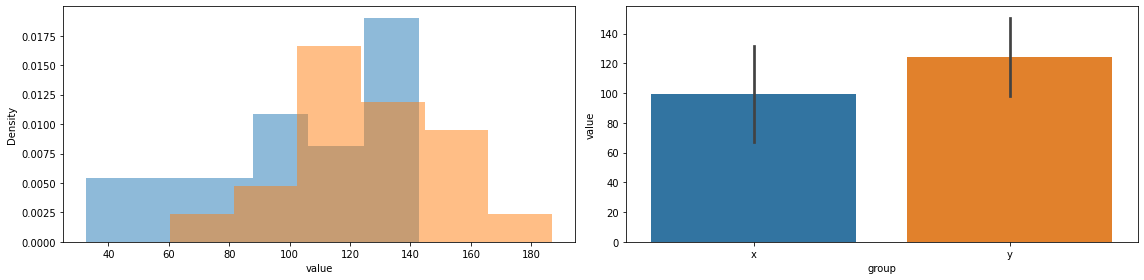

In [86]:
# Create the figure and the axes
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 4))

# Plot the histogram
for (x, color) in (x1, "C0"), (x2, "C1"):
    sns.histplot(x, ax=ax1, color=color, linewidth=0, alpha=0.5, 
                 stat="density") # y-axis is density instead of counts

# Set the axis labels
ax1.set_ylabel("Density")
ax1.set_xlabel("value")

# Plot the barplot
df = pd.DataFrame({"x": x1, "y": x2}).melt(var_name="group")
sns.barplot(x="group", y="value", ax=ax2, data=df, ci="sd")

plt.tight_layout()
plt.show()

In [87]:
# Set the threshold
thr = 0.05

# Run a Student's t-test
t, p = stats.ttest_ind(x1, x2, equal_var=True)

# Print the result
print(f"t={t}, p={p}, can reject={p < thr}")

t=-2.591248617060576, p=0.013492277877684325, can reject=True


---

Let's compute it by hand:

[...] 

with $s_{X_1}^2$ and $s_{X_2}^2$ are the unbiased estimators of the variances of $X_1$ and $X_2$.
 
The unbiased estimator of variance for a sample $X$ is defined as:

$${s_{X=[x_1, ..., x_n]}^{2}= {\frac {1}{n-1}}\sum _{i=1}^{n}\left(x_{i}-{\overline {X}}\right)^{2}}$$
[...]

In [88]:
# Compute the unbiased estimators of the variance
var1 = np.var(x1, ddof=1)
var2 = np.var(x2, ddof=1)

# Make a few prints
print("var1", var1)
print("var2", var2)

var1 1092.6737289949485
var2 733.3891932316409


[...] 

The pooled standard deviation of the two samples $X_1$ and $X_2$, noted $s_p$, is defined as:

$${\displaystyle s_{p}={\sqrt {\frac {s_{X_{1}}^{2}+s_{X_{2}}^{2}}{2}}}.}$$
[...]

In [89]:
# Compute the pooled standard deviation of the two samples
sp = np.sqrt((var1 + var2)/2)

# Print the result
print("sp", sp)

sp 30.216410460431838


Now, we have everything we need to compute the t-test using the formula:

$$ t={\frac {{\bar {X}}_{1}-{\bar {X}}_{2}}{s_{p}{\sqrt {\frac {2}{n}}}}}$$
[...]

In [90]:
# Compute the denominator
denom = sp * np.sqrt(2 / n)

# Print the result
print("denominator", denom)

denominator 9.555267976950173


In [91]:
# Compute the numerator
mean1 = np.mean(x1)
mean2 = np.mean(x2)

num = mean1 - mean2

# Print the result
print("numerator", num)

numerator -24.76007493091535


In [92]:
# Compute the value of the t
t = num/denom

# Print the result
print("t", t)

t -2.5912486170605766


In [93]:
# Compare with the values used using Scipy
t, p = stats.ttest_ind(x1, x2, equal_var=True)
print("t", t, "p", p)

t -2.591248617060576 p 0.013492277877684325


## 5.2 Compute the p-value <a id="S5.2"></a>
<a href="#Course-Overview">Course Overview</a>

Student's t-distribution has the <b>probability density function</b> given by:
$$f(x) = \frac{\Gamma \left(\frac{\nu+1}{2} \right)} {\sqrt{\nu\pi}\,\Gamma \left(\frac{\nu}{2} \right)} \left(1+\frac{x^2}{\nu} \right)^{-\frac{\nu+1}{2}}$$
where $\nu$  is the number of degrees of freedom and $\Gamma (\alpha )$ is the gamma function. For all positive integers, $ \Gamma (\alpha )=(\alpha -1)!$

The <a href="https://stattrek.com/statistics/dictionary.aspx?definition=degrees-of-freedom">degrees of freedom</a> is equal $2n − 2$ where n is the number of participants in each group.

---

Computing the number of degrees of freedom is quite straightforward...

In [94]:
# Compute the number of degrees of freedom
df = 2*n - 2

# Print the result
print("degrees of freedom:", df)

degrees of freedom: 38


---

Now, let's represent the probability density function of the t-distribution, given our specific number of degrees of freedom...

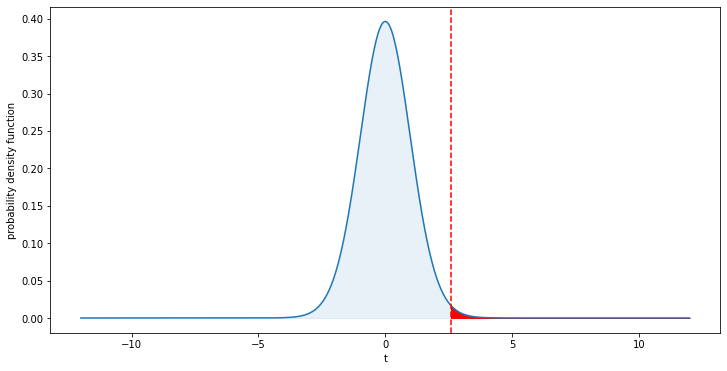

In [95]:
# Create the figure and the axis
fig, ax = plt.subplots(figsize=(12, 6))

# Shortcut for the gamma function
g = sps.gamma

abs_t = np.abs(t)

x = np.linspace(-12, 12, 1000)
y = (g((df+1)/2) / (np.sqrt(df * np.pi)*g(df/2))) * (1+x**2/df) ** (-(df+1)/2)
# Note that this can be shortened into 'y = stats.t.pdf(x, df=df)'

ax.plot(x, y)

# Fill the area under the curve on the left of the t-value with blue
x_blue = np.linspace(-12, abs_t, 1000)
y_blue = (g((df+1)/2) / (np.sqrt(df * np.pi)*g(df/2))) * (1+x_blue**2/df) ** (-(df+1)/2)
ax.fill_between(x_blue, 0, y_blue, color="C0", alpha=0.1)

# Fill the area under the curve on the right of the t-value with red
x_red = np.linspace(abs_t, 12, 1000)
y_red = (g((df+1)/2) / (np.sqrt(df * np.pi)*g(df/2))) * (1+x_red**2/df) ** (-(df+1)/2)
ax.fill_between(x_red, 0, y_red, color="red")

# Draw the line for representing the t-value
ax.axvline(abs_t, ls='--', color="red")

# Set the axis labels
ax.set_xlabel("t")
ax.set_ylabel("probability density function")

plt.show()

The p-value one sided correspond to the area under the curve after the t-value.

For computing the area under the curve, we need the cumulative distribution function...

---

The <b>cumulative distribution function</b> is given by:
$$
     F(x) = \frac{1}{2} + x \Gamma \left( \frac{\nu+1}{2} \right)  \times
     \frac{\,_2F_1 \left ( \frac{1}{2},\frac{\nu+1}{2};\frac{3}{2};
           -\frac{x^2}{\nu} \right)}
     {\sqrt{\pi\nu}\,\Gamma \left(\frac{\nu}{2}\right)}$$
where $_2F_1$ is the hypergeometric function

---

Let's represent the cumulative distribution function...

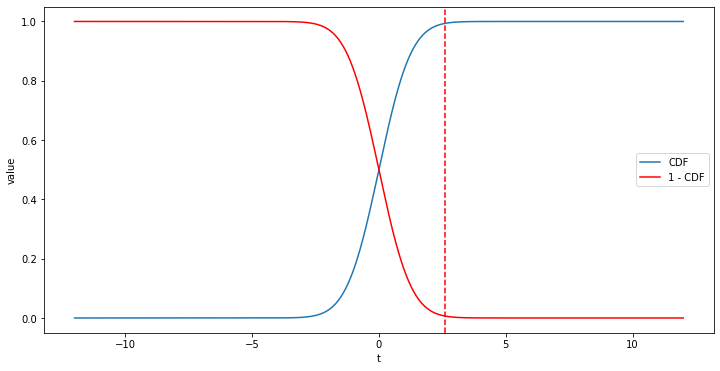

In [96]:
# Create the figure and the axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the cumulative density functiion
x = np.linspace(-12, 12, 1000)
y1 = stats.distributions.t.cdf(x, df)
ax.plot(x, y1, label="CDF", color="C0")

# Plot the survival function (1 - CDF)
ax.plot(x, 1 - y1, label="1 - CDF", color="red")

# Plot the line representing the t-value
ax.axvline(abs_t, ls='--', color="red")

# Set the axis labels
ax.set_xlabel("t")
ax.set_ylabel("value")

# Create the legend
ax.legend()

plt.show()

---

Let's know compute the two-sided p-value, by multiplying by 2 the subtraction of the cumulative distribution to 1.

In [97]:
# Compute the p-value
p = (1 - stats.distributions.t.cdf(abs_t, df)) * 2

# Print the result
print("p", p)

p 0.013492277877684256


In [98]:
# Compute the p-value using Scipy and compare...
t, p = stats.ttest_ind(x1, x2)
print("t", t, "p", p)

t -2.591248617060576 p 0.013492277877684325


---

<i>Note: For further explanation on the computation of the p-value, you can refer to: <a href="https://doi.org/10.1038/nmeth.2698">Krzywinski, M., Altman, N. Significance, P values and t-tests. Nat Methods 10, 1041–1042 (2013).</a></i>

## 5.3 One-sided vs two-sided<a id="S5.3"></a>
<a href="#Course-Overview">Course Overview</a>

We talk about 'two-sided' because you take the value under the curve on both sides of the probability function.

Let's represent that graphically...

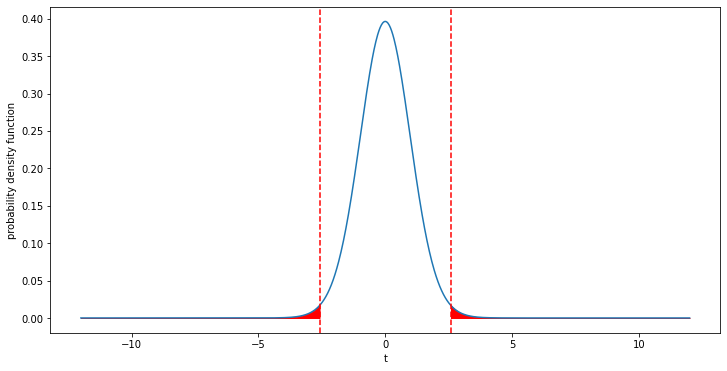

In [99]:
# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Define x-limits 
min_x, max_x = -12, 12

# Represent the bell curve
x = np.linspace(min_x, max_x, 1000)
y = stats.t.pdf(x, df=df)  # Now, using the shortcut provided by Scipy
ax.plot(x, y)

# Set the axis labels
ax.set_xlabel("t")
ax.set_ylabel("probability density function")

# Fill the area under the curve
for t_ in (abs_t, -abs_t):
    if t_ > 0:
        x = np.linspace(t_, max_x, 1000)
    else:
        x = np.linspace(min_x, t_, 1000)
    y_f = stats.t.pdf(x, df=df)
    ax.fill_between(x, 0, y_f, color="red")
    
    # Draw a line corresponding to the t-value
    ax.axvline(t_, ls='--', color="red")

plt.show()

---

<i>Note: **Two-sided** is **more conservative** than one sided</i> (you should by default use a two-sided, except if you have strong reason to not do so)

## 5.4 The number of subjects matters<a id="S5.4"></a>
<a href="#Course-Overview">Course Overview</a>

Let's the see how the p-value for a given t-value change depending on the number of subjects...

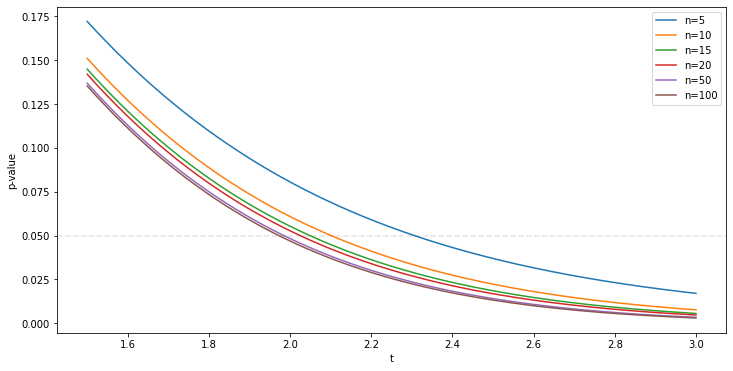

In [100]:
# Set the sample size to use
ns = [5, 10, 15, 20, 50, 100]

# Set the t-values to use
x = np.linspace(1.5, 3, 1000)

# Create the figure
fig, ax = plt.subplots(figsize=(12, 6))

# For each n...
for n in ns:
    # Compute the number of degrees of freedom
    df = 2*n - 2
    
    # Compute the CDF
    y = (1 - stats.distributions.t.cdf(x, df)) * 2
    
    # Plot the result
    ax.plot(x, y, label=f"n={n}")
    
# Set the axis labels
ax.set_xlabel("t")
ax.set_ylabel("p-value")

# Create a line for the magic threshold
ax.axhline(0.05, ls='--', color="black", alpha=0.1)

# Create the legend
ax.legend()

plt.show()

The more you will increase your $n$, the more you will increase the probability to have significant results

<div class="alert alert-block alert-danger">
<h2><img src="img/logo/warning.png" width="20" align="left">&nbsp;Important</h2>
    <br>
    Use a <b>number large enough of subjects</b> to avoid <b>false negative</b>.
    </div>

# 6. The condition of application of a stastical test: Which test can I use?<a id="S6"></a>
<a href="#Course-Overview">Course Overview</a>

<img src="img/doc_t_test.png" width="600">

A Student t-test assumes that:

* <b> Equal size of sample </b>

* <b> Normal distribution</b>:  The population from which samples are drawn should be normally distributed.

* <b>Homogeneity of variance</b>: Homogeneity means that the variance among the groups should be approximately equal.

<div class="alert alert-block alert-danger">
<h2><img src="img/logo/warning.png" width="20" align="left">&nbsp;Important</h2>
    <br>
    A statistical test have <b>conditions</b> of application relative to the <b>shape of the distributions</b> you wish to compare
    </div>

Let's see with two samples how to test if they meet the requirements for comparing them with a Student's t-test:

In [53]:
# Seed the random number generator
np.random.seed(1285)

# Set the parameters
n = 100
mu1 = 10
mu2 = 20
sig = 10

# Generate the sample
x1 = np.random.normal(mu1, scale=sig, size=n)
x2 = np.random.normal(mu2, scale=sig, size=n)

Testing the size of sample is pretty straightforward...

In [54]:
# Test the equality of sample sizes
is_equal = len(x1) == len(x2)
print("is equal", is_equal)

is equal True


Let's test the normality of the distribution using a <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html">D’Agostino and Pearson’s</a> test. The <b>null hypothesis</b> is that the <b>data are normally distributed</b>.

In [55]:
# Run the  D’Agostino and Pearson’s test for sample x1
k, p = stats.normaltest(x1)

# Print the result
print(f"k={k}, p={p}")

k=1.5798844659411548, p=0.4538710133052598


In [ ]:
# Run the  D’Agostino and Pearson’s test for sample x2
k, p = stats.normaltest(x2)

# Print the result
print(f"k={k}, p={p}")

Let's test the normality of the distribution using a <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html">Levene</a> test. The <b>null hypothesis</b> is that the <b>all samples are from populations with equal variances</b>.

In [56]:
# Run the Levene test
stat, p = stats.levene(x1, x2)

# Print the result
print(f"k={k}, p={p}")

k=1.5798844659411548, p=0.7942487504762309


## 6.1 The number of subjects is not the same and/or variances are unequal: Welch's t-test<a id="S6.1"></a>
<a href="#Course-Overview">Course Overview</a>

...but the <b>distribution</b> is still (expected to be) <b>normal</b>

In [57]:
# Seed the random number generator
np.random.seed(4)

# Set the parameters
m1, m2 = 100, 150
sd1, sd2 = 50, 10
n = 100

# Generate two samples
x1 = np.random.normal(m1, scale=sd1, size=n)
x2 = np.random.normal(m2, scale=sd2, size=n)

# Make a few prints
print("x1", x1)
print("x2", x2)

x1 [102.52808536 124.99756666  50.20455344 ...  91.42676952  52.78157003
 114.04323377]
x2 [157.38247111 156.50753231 156.1474063  ... 158.76742482 145.17121314
 140.14581539]


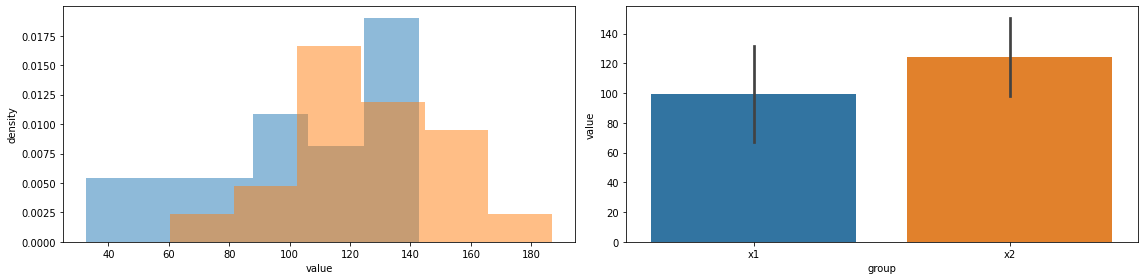

In [101]:
# Create figure and axes
fig, axes = plt.subplots(ncols=2, figsize=(16, 4))

# Plot the histogram
ax = axes[0]
sns.histplot(x1, ax=ax, color="C0", linewidth=0, alpha=0.5, stat="density")
sns.histplot(x2, ax=ax, color="C1", linewidth=0, alpha=0.5, stat="density")

# Set the axis labels
ax.set_ylabel("density")
ax.set_xlabel("value")

# Plot the barplot
ax = axes[1]
df = pd.DataFrame({"x1": x1, "x2": x2}).melt(var_name="group")
sns.barplot(x="group", y="value", ax=ax, data=df, ci="sd")

plt.tight_layout()
plt.show()

The Welch's t-test can be computed this way:

$${\displaystyle t={\frac {{\bar {X}}_{1}-{\bar {X}}_{2}}{s_{\bar {\Delta }}}}}$$
where

$${\displaystyle s_{\bar {\Delta }}={\sqrt {{\frac {s_{1}^{2}}{n_{1}}}+{\frac {s_{2}^{2}}{n_{2}}}}}.}$$

In [102]:
# Compute a Welch's t-test
# Note that the 'equal-var=False' that will force the use of a Welch's t-test 
# (instead of a Student t-test)
t, p = stats.ttest_ind(x1, x2, equal_var=False)

# Print the result
print(f"t={t}, p={p}")

t=-2.591248617060576, p=0.013654855169161626


## 6.2 The distribution is not (does not seem) normal: Rank dependant tests<a id="S6.2"></a>
<a href="#Course-Overview">Course Overview</a>

...also called '<b>non-parametric</b>' tests.

Let's take an example...

---

Let's now consider data following a Gamma distribution, that is such that:
$$ D_G \sim \mathrm{Gamma} (\alpha ,\beta )$$
the probability density function of the Gamma distribution being :
$${\begin{aligned}f(x;\alpha ,\beta )&={\frac {\beta ^{\alpha }x^{\alpha -1}e^{-\beta x}}{\Gamma (\alpha )}}\quad {\text{ for }}x>0\quad \alpha ,\beta >0,\\[6pt]\end{aligned}}$$
where $\Gamma (\alpha )$ is the gamma function. For all positive integers, $ \Gamma (\alpha )=(\alpha -1)!$

In [103]:
# Seed the random number generator
np.random.seed(124)

# Set the parameters
# From the doc of 'np.random.gamma': Samples are drawn from a Gamma distribution with specified parameters, 
# shape (sometimes designated “k”) and scale (sometimes designated “theta”), 
# where both parameters are > 0.
# knowing that theta = 1/beta
k1, t1 = 1, 10
k2, t2 = 1.3, 14
n = 25

# Generate two samples
x1 = np.random.gamma(k1, scale=t1, size=n)
x2 = np.random.gamma(k2, scale=t2, size=n)

# Make a few prints
print("x1", x1)
print("x2", x2)

x1 [ 1.12122108 13.68342406  8.49364914 ...  8.10844989  5.19171155
  1.52866687]
x2 [29.33705625 10.55513547  9.03522155 ... 30.88223766 70.36511674
 13.5331025 ]


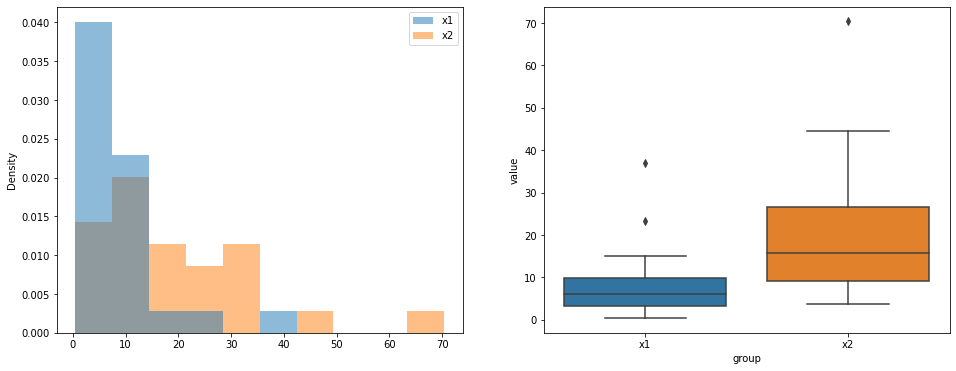

In [104]:
# Create the figure and axes
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))

# Plot the histogram
sns.histplot(ax=ax1, data=pd.DataFrame({"x1": x1, "x2": x2}),
             stat="density",  linewidth=0, alpha=0.5)

# Plot the boxplot
df = pd.DataFrame({"x1": x1, "x2": x2}).melt(var_name="group")
sns.boxplot(x="group", y="value", ax=ax2, data=df)

plt.show()

### 6.2.1 Compute a Mann–Whitney U <a id="S6.2.1"></a>
<a href="#Course-Overview">Course Overview</a>

Original article: <a href="doi:10.1214/aoms/1177730491">Mann, Henry B.; Whitney, Donald R. (1947). "On a Test of Whether one of Two Random Variables is Stochastically Larger than the Other". Annals of Mathematical Statistics. 18 (1): 50–60.</a> 

In [105]:
# Compute the Mann-Whitney U
# Note: the default option is deprecated
# Remember to use the argument "alternative='two-sided'"
u, p = stats.mannwhitneyu(x1, x2, alternative='two-sided')

# Print the results
print(f"u = {u}, p={p}")

u = 131.0, p=0.00044488884040892583


---

How does it work?

1. Assign numeric ranks to all the observations (put the observations from both groups to one set), beginning with 1 for the smallest value. Where there are groups of tied values, assign a rank equal to the midpoint of unadjusted rankings. 

Ex: 
* the ranks of (3, 5, 6, 15, 25) are (1, 2, 3, 4, 5)
* the ranks of (3, 5, 5, 5, 5, 8) are (1, 3.5, 3.5, 3.5, 3.5, 6) <i>[note the unadjusted rank would be (1, 2, 3, 4, 5, 6))]</i>.


In [106]:
# Compute the n
n1 = len(x1)
n2 = len(x2)

# Rank the values
ranked = stats.rankdata(np.concatenate((x1, x2)))

# Print the result
print("ranked values", ranked)

ranked values [ 2. 32. 22. ... 45. 50. 31.]


2. add up the ranks for the observations which came from sample 1. The sum of ranks in sample 2 is now determinate, since the sum of all the ranks equals $N(N + 1)/2$ where $N$ is the total number of observations.

$U$ is then given by:

$$U_{1}=R_{1}-{n_{1}(n_{1}+1) \over 2}\,\!$$
where n1 is the sample size for sample 1, and R1 is the sum of the ranks in sample 1.

$$U_{2}=R_{2}-{n_{2}(n_{2}+1) \over 2}\,\!$$

In [107]:
# get the ranks for the sample x1
rank_x1 = ranked[0:n1]

# calc U for x1
u1 = n1 * n2 + (n1 * (n1 + 1)) / 2.0 - np.sum(rank_x1, axis=0)

# remainder is U for x2
u2 = n1 * n2 - u1

# Print the result
print(f"u1 = {u1}; u2 = {u2}")

u1 = 494.0; u2 = 131.0


In [108]:
# Compare with what is obtained using Scipy...
u, p = stats.mannwhitneyu(x1, x2, alternative='two-sided')
print(f"u = {u}, p={p}")

u = 131.0, p=0.00044488884040892583


### 6.2.2 Compute the p-value of a Mann-Whitney U<a id="S6.2.2"></a>
<a href="#Course-Overview">Course Overview</a>

For large samples (n>20), U is approximately normally distributed, with 

$$\mu = \frac {n_{1}n_{2}}{2}$$

$$\sigma^2 = \sqrt {n_1 n_2 (n_1+n_2+1) \over 12}$$
if there is a tie, a correction is necessary:

$$\sigma^2_{\text{corr}}={\sqrt {{n_{1}n_{2} \over 12}\left((n+1)-\sum _{i=1}^{k}{{t_{i}}^{3}-t_{i} \over n(n-1)}\right)}}\,$$

where $n = n_1 + n_2$, $t_i$ is the number of subjects sharing rank $i$, and $k$ is the number of (distinct) ranks.

In [109]:
# Compute the mean of the U distribution
mean_rank = n1*n2/2.0

# Print the result
print("mean_rank", mean_rank)

mean_rank 312.5


In [110]:
# Compute the sd of the U distribution
# Note: we assume that there is not tie here
sd = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12.0) 

# Print the result
print("sd", sd)

sd 51.53882032022076


In [111]:
# Take the max of U1 and U2
u = max(u1, u2)

# Compute the p-value
p = (1 - stats.norm.cdf(u, loc=mean_rank, scale=sd)) * 2

# Print the result
print("p", p)

p 0.0004289228995439931


In [112]:
# Alternative: compute Z-score first
z = (u - mean_rank) / sd

# Compute the p-value using the Z-score
p = (1 - stats.norm.cdf(z)) * 2
print("p", p)

p 0.0004289228995439931


In [113]:
# Compare with what is obtained using Scipy...
u, p = stats.mannwhitneyu(x1, x2, alternative='two-sided')
print(f"u = {u}, p={p}")

u = 131.0, p=0.00044488884040892583


In [114]:
# The small difference disappears with 'use_continuity=False' argument
# Indeed, by default, a correction is made assuming data 
# are on a continuous scale
u, p = stats.mannwhitneyu(x1, x2, use_continuity=False, 
                          alternative='two-sided')

# Print the result
print(f"u = {u}, p={p}")

u = 131.0, p=0.00042892289954401424


---

Don't forget to read the <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html">doc</a> for the conditions of application!

<img src="img/doc_mw.png" width="600">

<div class="alert alert-block alert-danger">
<h2><img src="img/logo/warning.png" width="20" align="left">&nbsp;Important</h2>
    <br>
    A statistical test have <b>conditions</b> of application relative to the <b>shape of the distributions</b> you wish to compare
    </div>

## 6.3 I want to compare the effect of two factors: ANOVA<a id="S6.3"></a>
<a href="#Course-Overview">Course Overview</a>

or <b>ANalysis Of VAriance</b> is probably what you're looking for...

Let's see an example...

---

In [115]:
# Import the data
df = pd.read_csv("data/stcp-Rdataset-Diet.csv")

# Look at the top of the file
print(df.head())

   Person gender  Age  Height  pre.weight  Diet  weight6weeks
0      25          41     171          60     2          60.0
1      26          32     174         103     2         103.0
2       1      0   22     159          58     1          54.2
3       2      0   46     192          60     1          54.0
4       3      0   55     170          64     1          63.3


Data from <a href="https://www.sheffield.ac.uk/polopoly_fs/1.570199!/file/stcp-Rdataset-Diet.csv">https://www.sheffield.ac.uk/polopoly_fs/1.570199!/file/stcp-Rdataset-Diet.csv</a>

In [73]:
# Print the counts
print(df.count())

Person          78
gender          78
Age             78
Height          78
pre.weight      78
Diet            78
weight6weeks    78
dtype: int64


In [74]:
# Create a new column with the loss of weight
df["Loss"] = df["pre.weight"] - df["weight6weeks"]
print(df.head())

   Person gender  Age  Height  pre.weight  Diet  weight6weeks  Loss
0      25          41     171          60     2          60.0   0.0
1      26          32     174         103     2         103.0   0.0
2       1      0   22     159          58     1          54.2   3.8
3       2      0   46     192          60     1          54.0   6.0
4       3      0   55     170          64     1          63.3   0.7


In [75]:
# See the different values for the 'gender' column
print(df["gender"].unique())

[' ' '0' '1']


In [76]:
# Remove the lines when the data is missing
df = df[df["gender"] != ' ']

# Print the new count
print(df.count())

Person          76
gender          76
Age             76
Height          76
pre.weight      76
Diet            76
weight6weeks    76
Loss            76
dtype: int64


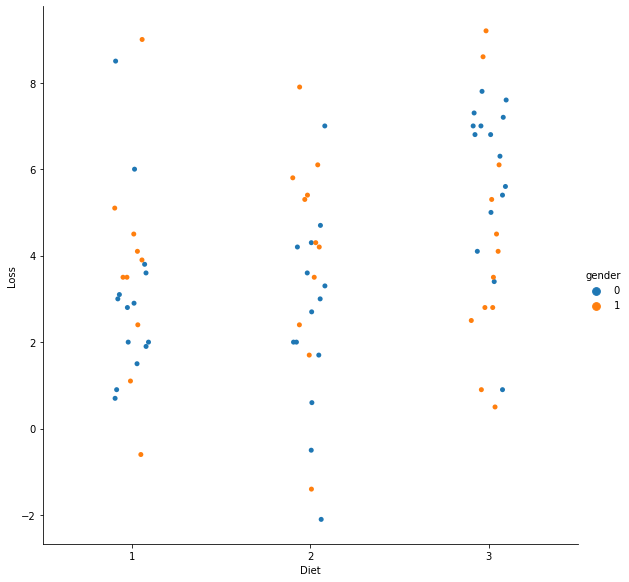

In [77]:
# Represent the raw data
g = sns.catplot(x="Diet", y="Loss", hue="gender",
                data=df, height=8)
plt.show()

In [116]:
# Use boxplot to synthesize the information
g = sns.catplot(x="Diet", y="Loss", hue="gender",
               data=df, kind="bar", height=8)
plt.show()

ValueError: Could not interpret input 'Loss'

In [117]:
# Do an Anova using the statsmodels library
# with the 'loss' as a VD and 'gender' and 'diet' as VI
formula = 'Loss ~ C(Diet) * C(gender)'
model = ols(formula, df).fit()
aov_table = anova_lm(model, typ=2)

# Print the result
print(aov_table)

PatsyError: Error evaluating factor: NameError: name 'Loss' is not defined
    Loss ~ C(Diet) * C(gender)
    ^^^^

---

The analysis of variance makes the following assumptions about the probability distribution of the responses:

* <b>Independence of observations </b>: The observations are independent of each other.

* <b>Normality</b>: The population from which samples are drawn should be normally distributed.

* <b>Homogeneity of variances</b>: The variance among the groups should be approximately equal</b>.

---

So, are my conclusions valid?

...we need to check the normality of the data.

Let's test the normality of the distribution using a <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html">D’Agostino and Pearson’s</a> test. The <b>null hypothesis</b> is that the <b>data are normally distributed</b>.

In [118]:
# Boolean for selecting the data such as...
# ...gender = 1
is_g1 = df.gender == "1"
# ...diet = 1
is_d1 = df.Diet == 1

# Compute the D'Agostino and Pearson's test
k2, p = stats.normaltest(df.Diet[is_g1 & is_d1])

# Print the result
print(f"k2={k2}, p={p}")

k2=2122.8650702932387, p=0.0


/usr/local/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


...unfortunately, our sample is too small. Are my conclusions still valid?

<div class="alert alert-block alert-danger">
<h2><img src="img/logo/warning.png" width="20" align="left">&nbsp;Important</h2>
    <br>
    A statistical test have <b>conditions</b> of application relative to the <b>shape of the distributions</b> you wish to compare
    </div>

## 6.4 I want to test the relation between two (continuous) variables: Regression Analysis<a id="S6.4"></a>
<a href="#Course-Overview">Course Overview</a>

...is probably what you're looking for.

Let's see an example...

---

In [119]:
# Import the data
df = pd.read_csv(os.path.join("data", "rr.csv"))

# Print the top of the file
print(df.head())

     Country  Year        Debt    Growth
0  Australia  1946  190.419080 -3.557951
1  Australia  1947  177.321371  2.459475
2  Australia  1948  148.929811  6.437534
3  Australia  1949  125.828699  6.611994
4  Australia  1950  109.809398  6.920201


Data from <a href="https://pubs.aeaweb.org/doi/pdf/10.1257/aer.100.2.573">Reinhart, C. M., & Rogoff, K. S. (2010). Growth in a Time of Debt. American economic review, 100(2), 573-78.</a>

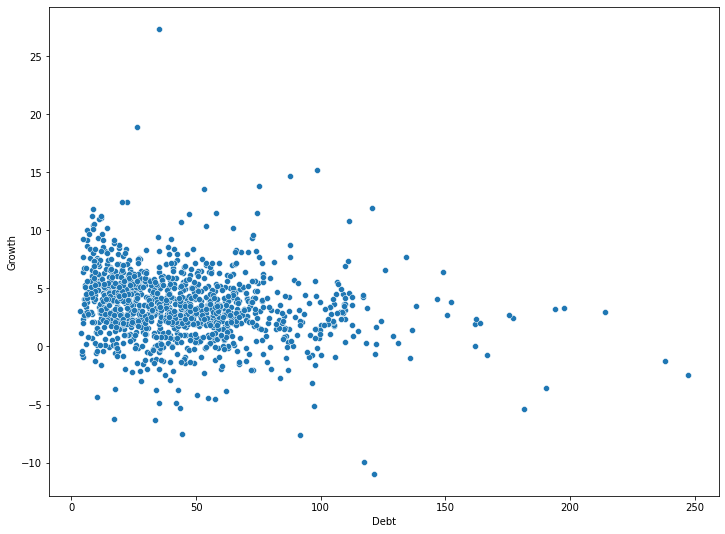

In [120]:
# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 9))

# Plot a scatter plot
sns.scatterplot(x="Debt", y="Growth", ax=ax, data=df)

plt.show()

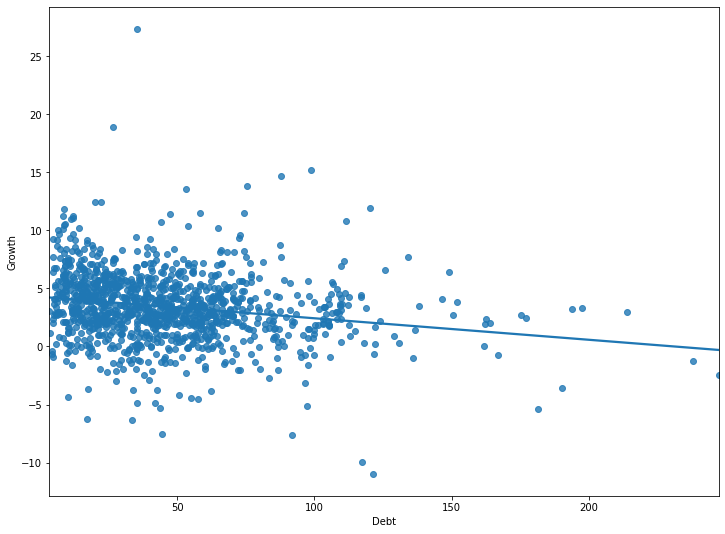

In [121]:
# Create figure and axes
fig, ax =plt.subplots(figsize=(12, 9))

# Plot a scatter plot and a regression line
sns.regplot(x="Debt", y="Growth", data=df, ax=ax, ci=None)

plt.show()


### 6.4.1 Compute a Pearson correlation coefficient <a id="S6.4.1"></a>
<a href="#Course-Overview">Course Overview</a>

$$r_{xy}= \frac {\sum \limits _{i=1}^{n}(x_{i}-{\bar {x}})(y_{i}-{\bar {y}})}{\sqrt {\sum \limits _{i=1}^{n}(x_{i}-{\bar {x}})^{2}\sum \limits _{i=1}^{n}(y_{i}-{\bar {y}})^{2}}}$$

where $\overline {x}$ and $\overline {y}$ are the sample means of $X$ and $Y$, and $s_{x}$ and $s_{y}$ are the corrected sample standard deviations of $X$ and $Y$.

Original article:  <a href="https://doi.org/10.1098/rspl.1895.0041">Pearson, Karl (1895). "Notes on regression and inheritance in the case of two parents". Proceedings of the Royal Society of London. 58: 240–242</a>.

---

In [122]:
# Shortcut for our two columns of interest
x, y = df["Debt"], df["Growth"]

# Compute the numerator
r_num = np.sum((x - np.mean(x)) * (y - np.mean(y)))

# Compute the denominator
r_denom = np.sqrt(np.sum((x - np.mean(x))**2))*np.sqrt(np.sum((y - np.mean(y))**2))

# Compute the r-value
r = r_num/r_denom

# Print the result
print("r", r)

r -0.19986576578883178


In [123]:
# Compare with what is obtained using Scipy
r_, p = stats.pearsonr(x, y)
print(f"r={r_}, p={p}")

r=-0.19986576578883178, p=4.723997934448434e-12


---

For computing a p-value, we assume that the coefficient correlation follows a Student's t-distribution. 

We can compute the t-value by using the formula:
$$t=r{\sqrt {\frac {\nu}{1-r^{2}}}}$$
with $\nu = n-2$ the number of degrees of freedom.

Then, we can use the the cumulative distribution function of the t-distribution to compute the p-value.

---

In [124]:
# Get the n
n = len(x)

# Compute the degrees of freedom
dof = n - 2

# Compute the t-value
t = r * np.sqrt(dof/(1 - r**2))

# Compute the p-value
p = 2 * (1 - stats.distributions.t.cdf(np.abs(t), dof))

# Print the result
print("p", p)

p 4.723998969780041e-12


In [125]:
# Compare with what is obtained using Scipy
r_, p = stats.pearsonr(x, y)
print(f"r={r_}, p={p}")

r=-0.19986576578883178, p=4.723997934448434e-12


### 6.4.2 Compute a linear regression<a id="S6.4.2"></a>
<a href="#Course-Overview">Course Overview</a>

$$y = \alpha + \beta x$$ 
which means in this case:
$$\text{Growth} = \alpha + \beta \text{Debt}$$


with:
$$ \alpha ={\bar {y}}-{\beta }\,{\bar {x}}$$

$$ \beta ={\frac {\sum _{i=1}^{n}(x_{i}-{\bar {x}})(y_{i}-{\bar {y}})}{\sum _{i=1}^{n}(x_{i}-{\bar {x}})^{2}}}$$

In [126]:
# Compute the slope
beta = r_num / np.sum((x - np.mean(x))**2)

# Compute the intercept
alpha = np.mean(y) - beta*np.mean(x)

# Print the results
print(f"alpha={alpha} beta={beta}")

alpha=4.270368134671323 beta=-0.018493267021115034


In [127]:
# Compare with what is obtained using Scipy
res = stats.linregress(df["Debt"], df["Growth"])
alpha = res.intercept
beta = res.slope

# Print the results
print(f"alpha={alpha} beta={beta}")

alpha=4.270368134671323 beta=-0.018493267021115038


---

Don't forget to read the <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html">doc</a> for knowing of the conditions of application!

<img src="img/doc_cor.png" width="500">
<img src="img/doc_cor2.png" width="500">

---

So, are my conclusions valid?

...we need to check the normality of the data.

Let's test the normality of the distribution using a <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html">D’Agostino and Pearson’s</a> test. The <b>null hypothesis</b> is that the <b>data are normally distributed</b>.

In [128]:
# Compute the D’Agostino and Pearson’s test for x
k2, p = stats.normaltest(x)

# Print the result
print(f"k2={k2}, p={p}")

k2=396.2673980743888, p=8.94597806691238e-87


In [129]:
# Compute the D’Agostino and Pearson’s test for y
k2, p = stats.normaltest(y)

# Print the result
print(f"k2={k2}, p={p}")

k2=183.83634788701931, p=1.2034949429170753e-40


...what makes sense when looking at the distribution of the data using a histogram (especially for the debt):

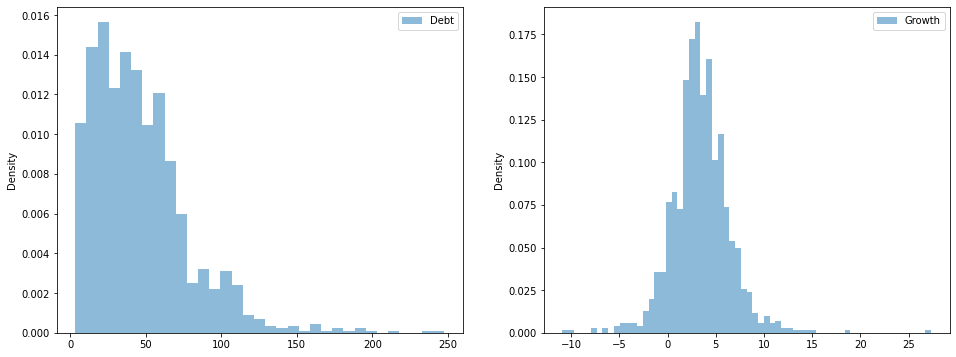

In [130]:
# Create figure and axes
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))

# Plot the left histogram
sns.histplot(ax=ax1, data=pd.DataFrame({"Debt": x}),
             stat="density",  linewidth=0, alpha=0.5)

# Plot the right histogram
sns.histplot(ax=ax2, data=pd.DataFrame({"Growth": y}),
             stat="density",  linewidth=0, alpha=0.5)
plt.show()

...so are my conclusions valid?

<div class="alert alert-block alert-danger">
<h2><img src="img/logo/warning.png" width="20" align="left">&nbsp;Important</h2>
    <br>
    A statistical test have <b>conditions</b> of application relative to the <b>shape of the distributions</b> you wish to compare
    </div>

## 6.5 I have only one group: Confidence Interval<a id="S6.5"></a>
<a href="#Course-Overview">Course Overview</a>

...is probably what you're looking for.

$$ \Pr(-c\leq \bar X \leq c)= 1-\alpha $$


Let's take an example...

---

In [131]:
# Import the data
df = pd.read_csv("data/flights.csv")

# Print the top of the file
print(df.head())

   year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0  2013      1    1     517.0             515        2.0     830.0   
1  2013      1    1     533.0             529        4.0     850.0   
2  2013      1    1     542.0             540        2.0     923.0   
3  2013      1    1     544.0             545       -1.0    1004.0   
4  2013      1    1     554.0             600       -6.0     812.0   

   sched_arr_time  arr_delay carrier  flight tailnum origin dest  air_time  \
0             819       11.0      UA    1545  N14228    EWR  IAH     227.0   
1             830       20.0      UA    1714  N24211    LGA  IAH     227.0   
2             850       33.0      AA    1141  N619AA    JFK  MIA     160.0   
3            1022      -18.0      B6     725  N804JB    JFK  BQN     183.0   
4             837      -25.0      DL     461  N668DN    LGA  ATL     116.0   

   distance  hour  minute             time_hour  
0      1400     5      15  2013-01-01T05:00:00Z  
1      141

Data from <a href="https://data.world/bob-wakefield/flights">https://data.world/bob-wakefield/flights</a>

In [132]:
# Clean the data set by removing the nan values
x = df.dropna()["arr_delay"].values
print("x", x)

x [ 11.  20.  33. ... -16.   1. -25.]


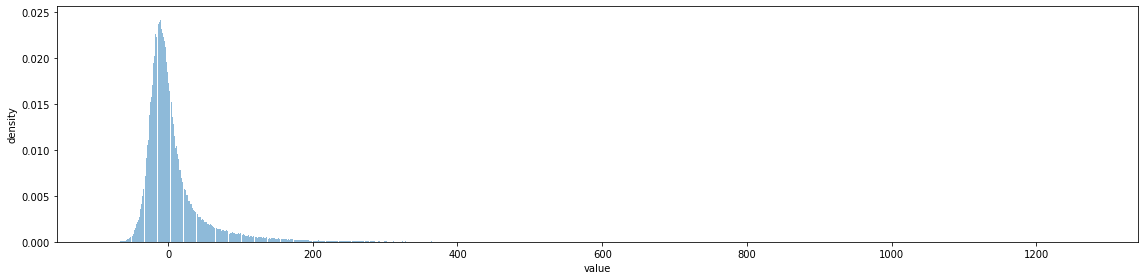

In [133]:
# Create figure and axe
fig, ax = plt.subplots(figsize=(16, 4))

# Plot the histogram
sns.histplot(x="arr_delay", ax=ax, color="C0", linewidth=0, 
             alpha=0.5, stat="density", data=df)

# Set the axis labels
ax.set_ylabel("density")
ax.set_xlabel("value")

plt.tight_layout()
plt.show()

Zooming a little bit...

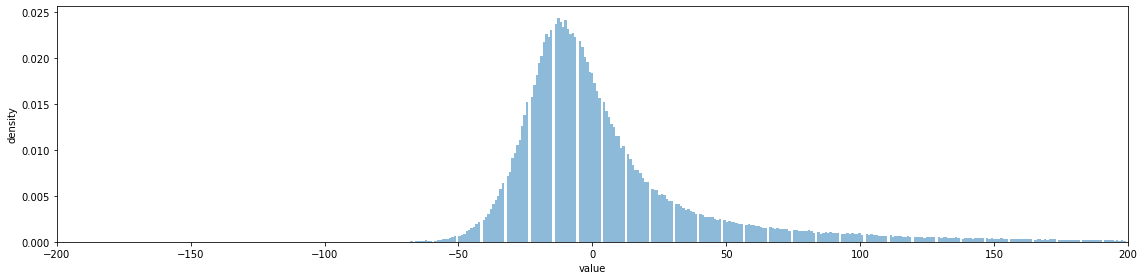

In [136]:
# Create figure and axe
fig, ax = plt.subplots(figsize=(16, 4))

# Plot the histogram
sns.histplot(x="arr_delay", ax=ax, color="C0", linewidth=0, alpha=0.5, stat="density", data=df)

# Set the limits of the x-axis
ax.set_xlim(-200, 200)

# Set the axis labels
ax.set_ylabel("density")
ax.set_xlabel("value")

plt.tight_layout()
plt.show()

---

How to compute a **confidence interval**?

1. Identify the sample mean, $\bar {x}$.


2. Identify whether the population standard deviation is known, {\displaystyle \sigma }\sigma , or is unknown and is estimated by the sample standard deviation {\displaystyle s}s.

    * If the population standard deviation is known then: 
    $$z^{*}=\Phi ^{-1}\left(1 - \frac{\alpha }{2}\right)$$

    * If the population standard deviation is unknown then the Student's t distribution is used as the critical value. This value is dependent on the confidence level (C) for the test and degrees of freedom ($n − 1$). $$t^{*}= F_t^{-1}\left(1 - \frac {\alpha }{2}; \nu \right)$$
    where $F_t^{-1}$ is the inverse of the cumulative function of $t$ and $\nu$ is the number of degrees of freedom.


3. Plug the found values into the appropriate equations:

    * For a known standard deviation: 
$$\displaystyle \left({\bar {x}}-z^{*}{\sigma  \over {\sqrt {n}}},{\bar {x}}+z^{*}{\sigma  \over {\sqrt {n}}}\right)$$

    * For an unknown standard deviation: 
$$\left({\bar {x}}-t^{*}{s \over {\sqrt {n}}},{\bar {x}}+t^{*}{s \over {\sqrt {n}}}\right)$$

---

Let's assume that we're dealing right now with Z-scores, and let's represent graphically the position of the upper bound...

In [137]:
# Set the threshold
alpha = 0.05

# CDF value at the place of the higher bound
where_to_look = 1 - alpha/2

# Percent point function: inverse of the CDF
z_star = stats.norm.ppf(where_to_look)
print("CDF value at the place of the higher bound", where_to_look)
print(f"z_star {z_star}")

# You may recognize here the magic number of 1.96
print(f"z_star rounded {z_star:.2f}")

CDF value at the place of the higher bound 0.975
z_star 1.959963984540054
z_star rounded 1.96


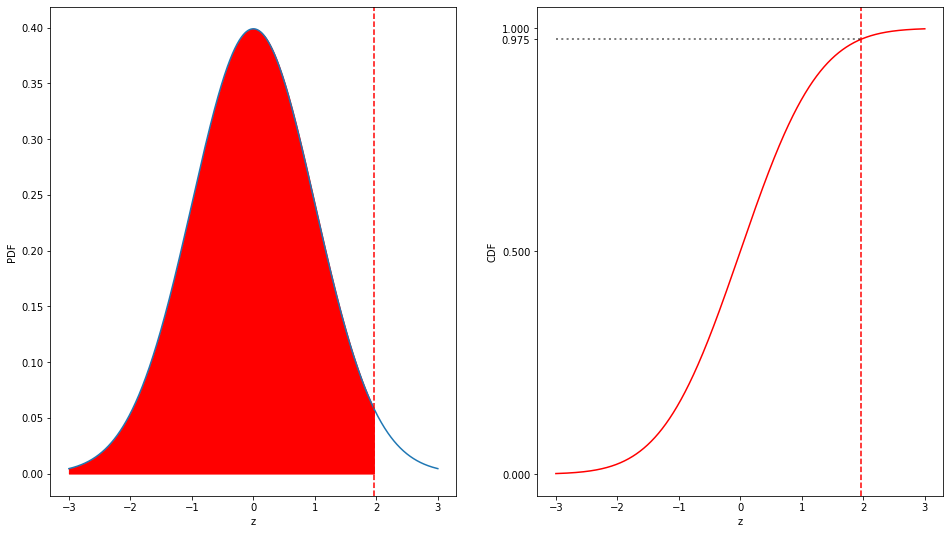

In [138]:
# Create the figure and axes
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 9))

# Set the parameters
mu = 0
sigma = 1

# Set the range of values
z_min, z_max = -3, 3

# Plot the bell curve
z = np.linspace(z_min, z_max, 1000) 
y = stats.norm.pdf(z)
ax1.plot(z, y)

# Plot the position fo the upper bounds
ax1.axvline(z_star, ls='--', color="red")

# Fill the area under the curve
x_f = np.linspace(z_min, z_star, 1000)
y_f = stats.norm.pdf(x_f)
ax1.fill_between(x_f, 0, y_f, color="red")

# Set the axis labels
ax1.set_xlabel("z")
ax1.set_ylabel("PDF")

# Plot the CDF on the right panel
y2 = stats.norm.cdf(z, loc=mu, scale=sigma)
ax2.plot(z, y2, color="red")

# Plot the position of the upper bound
ax2.axvline(z_star, ls='--', color="red")

#. Plot the position of the y-value
ax2.plot((z_min,z_star), (1-alpha/2, 1-alpha/2), color="black", alpha=0.5, lw=2, ls=":")
ax2.set_yticks([0, 0.5, 1-alpha/2, 1])

# Set the axis labels
ax2.set_xlabel("z")
ax2.set_ylabel("CDF")

plt.show()

---

Let's come back to our 'delay of arrival' problem.

Here, as we don't know the standard deviation of our sample, we shall use:

$$\left({\bar {x}}-t^{*}{s \over {\sqrt {n}}},{\bar {x}}+t^{*}{s \over {\sqrt {n}}}\right)$$

But first, we need to check the normality of the data.

Let's test the normality of the distribution using a <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html">D’Agostino and Pearson’s</a> test. The <b>null hypothesis</b> is that the <b>data are normally distributed</b>.

In [139]:
# Compute the D’Agostino and Pearson’s test for our sample
k2, p = stats.normaltest(x)

# Print the result
print(f"k2={k2}, p={p}")

k2=271017.5230787647, p=0.0


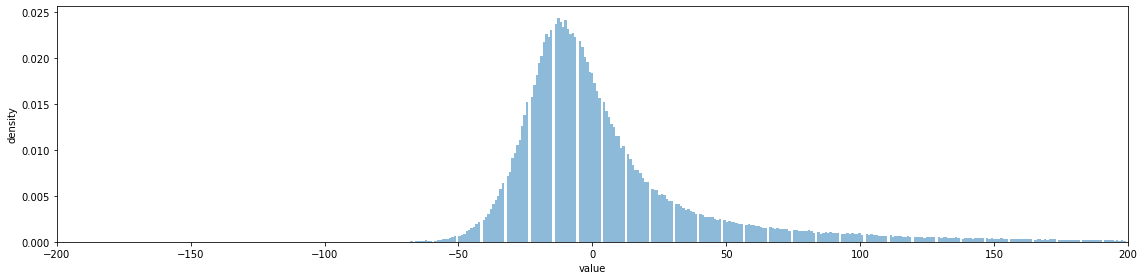

In [140]:
# Create figure and axes
fig, ax = plt.subplots(figsize=(16, 4))

# Plot the histogram
sns.histplot(x="arr_delay", ax=ax, color="C0", linewidth=0, alpha=0.5, stat="density", data=df)

# Set the x-axis limits
ax.set_xlim(-200, 200)

# Set the axis labels
ax.set_ylabel("density")
ax.set_xlabel("value")

plt.tight_layout()
plt.show()

...so what should I do?

<div class="alert alert-block alert-danger">
<h2><img src="img/logo/warning.png" width="20" align="left">&nbsp;Important</h2>
    <br>
    A statistical test have <b>conditions</b> of application relative to the <b>shape of the distributions</b> you wish to test
    </div>

Let's use instead an artificial sample...

In [141]:
# Seed the random number generator
np.random.seed(12345)

# Generate a sample
x = np.random.normal(100, scale=30, size=30)

# Print a few values
print("x", x)

x [ 93.85877022 114.36830014  84.41683855 ... 115.71316204 100.02820833
 140.31429381]


In [142]:
# Compute the D’Agostino and Pearson’s test for this new sample
k2, p = stats.normaltest(x)

# Print the result
print(f"k2={k2}, p={p}")

k2=2.4503721339830875, p=0.29370304679675713


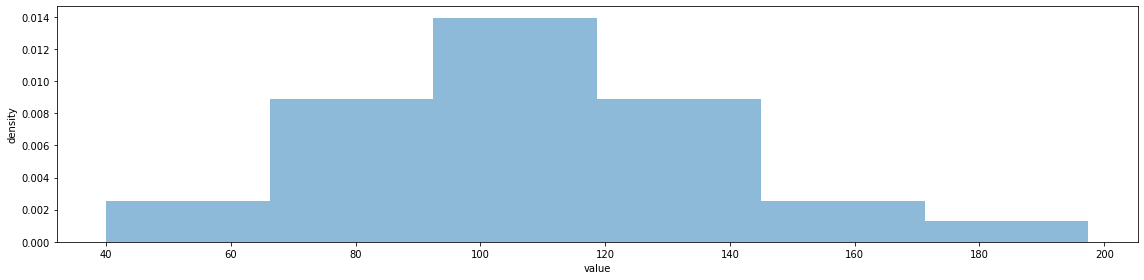

In [143]:
# Create the figure
fig, ax = plt.subplots(figsize=(16, 4))

# Plot the histogram
sns.histplot(x, ax=ax, color="C0", linewidth=0, alpha=0.5, stat="density")

# Set the axis labels
ax.set_ylabel("density")
ax.set_xlabel("value")

plt.tight_layout()
plt.show()

In [144]:
# Set the threshold
alpha = 0.05

# Get the sample size
n = len(x)

# Compute the mean
m = np.mean(x)

# Compute the standard error
se = stats.sem(x)

# Compute the CDF value at the upper bound
cdf_value_upper_bound = 1 - alpha / 2.

# Compute the number of degrees of freedom
dof = n-1

# Compute the size of half of the confidence interval
c = se * stats.t.ppf(cdf_value_upper_bound, dof)  # Percent point function: inverse of the CDF

# Compute the confidence interval
ic = m-c, m+c

# Print the result
print("IC", ic)

IC (98.25481965822752, 122.03055773327455)


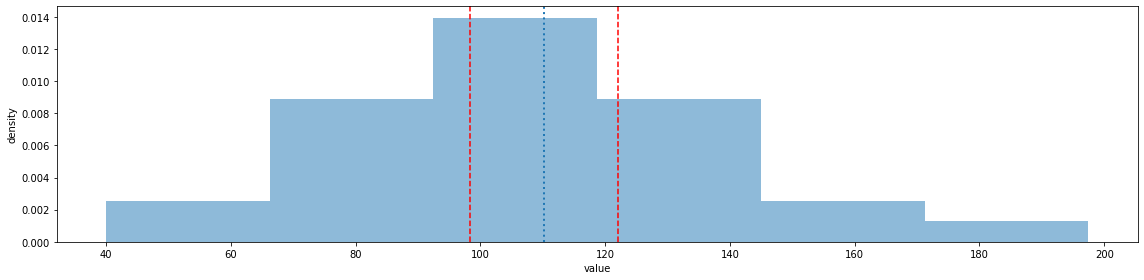

In [145]:
# Create figure and axes
fig, ax = plt.subplots(figsize=(16, 4))

# Plot the histogram
sns.histplot(x, ax=ax, color="C0", linewidth=0, alpha=0.5, stat="density")

# Set the axis labels
ax.set_ylabel("density")
ax.set_xlabel("value")

# Plot the vertical lines
ax.axvline(ic[0], ls="--", color="red")
ax.axvline(ic[1], ls="--", color="red")
ax.axvline(m, color="C0", lw=2, ls=':')

plt.tight_layout()
plt.show()

# 7. External validity: The todo-NOT list<a id="S7"></a>
<a href="#Course-Overview">Course Overview</a>

* Do **not** think that a **significant** result means that you're sure that there is a **causal** relationship (remember the <a href="http://www.tylervigen.com/spurious-correlations">spurious correlations</a>)

<img src="img/sun.jpeg" width="500">

* Do **not mutitply** the post hoc **analysis** until you get something **significant**

<img src="img/Eureka-1.jpg" width="300">

* Do not think that a non-significant result means that there is no effect: "**Absence of evidence is not evidence of absence**"

<img src="img/comics_sign.jpeg" width="500">

## Conclusive Remarks and a Few Takeaways<a id="C"></a>
<a href="#Course-Overview">Course Overview</a>

<div class="alert alert-block alert-success">
<h2><img src="img/logo/goal.png" width="20" align="left">&nbsp;Learning objectives</h2>
    <br>
    <ul>
        <li> Understand what is a inferential test and a <i>p</i> value
        <li> Being able to assess the statistical significance of an experimental result
        <li> Differenciate what is a type-1 and type-2 error
        <li> Understand the conditions of application of a test
        <li> Know what are the most classical tests and when to apply them
        <li> Being able to assess the external validy of a study
    </ul>
</div>

## Additional material
<a href="#Course-Overview">Course Overview</a>

In [187]:
# Compute a regression analyis using 'statsmodels' library
# which is more 'R' like and more verbose
df = pd.read_csv(os.path.join("data", "rr.csv"))

formula = "Growth ~ Debt"
model =  ols(formula, df).fit()  #sm.OLS(Y, X).fit()

print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:                 Growth   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     48.81
Date:                Sun, 13 Sep 2020   Prob (F-statistic):           4.72e-12
Time:                        21:27:07   Log-Likelihood:                -2930.9
No. Observations:                1175   AIC:                             5866.
Df Residuals:                    1173   BIC:                             5876.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2704      0.150     28.558      0.0